In [3]:
import numpy as np 
import matplotlib.pyplot as plt



In [4]:
def is_even(n):
    return n//2 * 2 == n

# define the SSH hamiltonian
def ssh_finite(v,w, N):
    # need N to be even
    if not is_even(N):
        raise Exception("N must be even")

    # Create the matrix
    mat = np.zeros((N, N))
    
    for k in range(0,N//2):
        i = 2 * k
        mat[i][i+1] = v
        mat[i+1][i] = v
        if i + 2 < N:
            mat[i+1][i+2] = w
            mat[i+2][i+1] = w
    
    # Compute eigenvectors
    eigs, vecs = np.linalg.eigh(mat)
    return eigs, vecs.T

def ssh_bulk(v, w, N):
    # Compute the spacings for the wave number
    k_range = np.linspace(0,2 *np.pi, N//2)

    # Compute the eigenvalues and eigenvectors for a specific wave numebr
    def k_eigs(k):
        mat = np.array([
            [0, v + w * np.exp(-1j*k)],
            [v + w * np.exp(1j*k),0]
        ])

        return np.linalg.eigh(mat)

    # Compute all eigenvalues and vectors
    eigs = []
    evecs = []
    for k in k_range:
        eig, vecs = k_eigs(k)

        eigs += list(eig)
        evecs += list(vecs.T)

    return np.array(eigs), np.array(evecs)

# Eigenvector plotting
# splits into +ve negative eigenvectors
def plot_eigs(eigs):
    p_eigs = np.sort(eigs[eigs>0])
    n_eigs = np.sort(eigs[eigs<0])[::-1]

    plt.plot(p_eigs)
    plt.plot(n_eigs)

# Plots an eigenvector
def plot_eigvec(vec, y_scale=0.5):
    plt.ylim(-y_scale, y_scale)
    plt.bar(list(range(0,len(vec))),vec)

def plot_periodic_eigvec(vec, N=10):
    l = len(vec)
    for i in range(0, N):
        plt.bar(list(range(i * l, (i+1) * l)), vec, color='blue')

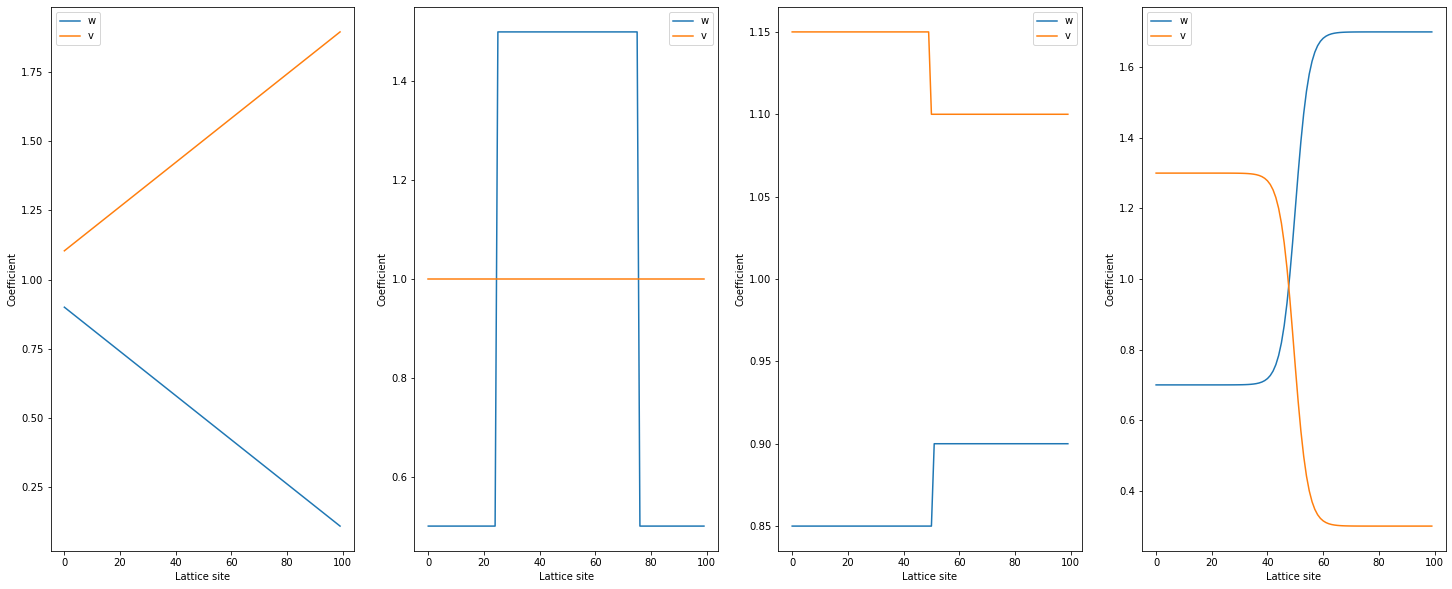

In [565]:
# Define the toy model hamiltonian

def toy_finite(v, N, epsilon, invert=False):
    # need N to be even
    if not is_even(N):
        raise Exception("N must be even")

    mat = np.zeros((N,N))
    for k in range(0,N//2):
        i = 2 * k
        mat[i][i+1] = v(i, epsilon, invert=invert)
        mat[i+1][i] = v(i, epsilon, invert=invert)
        if i + 2 < N:
            mat[i+1][i+2] = v(i+1, epsilon, invert=invert)
            mat[i+2][i+1] = v(i+1, epsilon, invert=invert)

    # Compute eigenvectors
    eigs, vecs = np.linalg.eigh(mat)
    return eigs, vecs.T

def linear_perturbation(N, start=0, end=1, base_size=0.1):
    def v(i, epsilon, invert=False):
        return 1 + (-1)**(i+invert + 1) * (epsilon * i * (end - start)/ N + base_size)

    return v

def tanh_perturbation(N, rate=0.1, base_size=0.3):
    def v(i, epsilon, invert=False):
        if is_even(i + 1 - invert):
            return 1 +  epsilon * (np.tanh((i - N//2) * rate) + 1) + base_size
        return 1 - epsilon * (np.tanh((i - N//2) * rate) + 1) - base_size
    
    return v


def tanh_single_perturbation(N, rate=0.1, base_size=0.3):
    def v(i, epsilon, invert=False):
        if is_even(i + 1 - invert):
            return 1 +  epsilon * (np.tanh((i - N//2 + 50) * rate) + 1) + base_size
        return 1 - base_size
    
    return v

def discrete_single_perturbation(N, rate=0.1, base_size=0.15):
    def v(i, epsilon, invert=False):
        if i > N//2:
            if is_even(i-invert):
                return 1 - epsilon - base_size
            return 1 + base_size
        return 1 + (-1)**(i+1+invert) * base_size
    
    return v

def dimer_perturbation(N, ws=1, vs=0.5):
    def v(i, epsilon, invert=False):
        if i > N//2:
            if is_even(i-invert):
                return epsilon
            return ws
        
        if is_even(i-invert):
            return vs
        return ws
    return v

def periodic_dimer_perturbation(N, ws=1, vs=0.5):
    # split the chain into quarters, the middle region is perturbed the others are not
    def v(i, epsilon, invert=False):
        if i < N//4 or i > 3 * N//4:
            if is_even(i-invert):
                return vs
            return ws
        
        if is_even(i-invert):
            return epsilon
        return ws
    
    return v

def discrete_perturbation(N, base_size=0.15):
    def v(i, epsilon, invert=False):
        if i > N//2:
            return 1 + (-1)**(i+1+invert) *(epsilon + base_size)
        return 1 + (-1)**(i+1+invert) * base_size
    
    return v

def uniform_perturbation(base, base_size=0.1):
    def v(i, epsilon, invert=False):
        return base + (-1)**(i+1 - invert) * (epsilon + base_size)
    
    return v

def plot_pert(perturbation, N, epsilon=0.3):
    r = list(range(0,N//2))
    w = []
    v = []

    for i in range(0,N):
        if is_even(i):
            w.append(perturbation(i, epsilon))
        else:
            v.append(perturbation(i, epsilon))


    plt.xlabel("Lattice site")
    plt.ylabel("Coefficient")

    plt.plot(list(range(0,len(w))), w, label='w')
    plt.plot(list(range(0,len(v))), v, label='v')
    plt.legend()

plt.figure(figsize=(25,10))
plt.subplot(141)
plot_pert(linear_perturbation(200),200, epsilon=0.8)
plt.subplot(142)
plot_pert(periodic_dimer_perturbation(200),200, epsilon=1.5)
plt.subplot(143)
plot_pert(discrete_perturbation(200),200, epsilon=-0.05)
plt.subplot(144)
plot_pert(tanh_perturbation(200), 200, epsilon=-0.5)

# plot_eigs(toy_finite(tanh_perturbation(100),100)[0])
# plot_eigs(ssh_finite(1.0,1.0,100)[0])


In [557]:
# Now introduce time dependent polarization computations, this involves slowly turning on the perturbation (epsilon 0 -> e)
# We can use the previously defined toy model to compute the instantaneous eigenvectors/values

def toy_finite_hamiltonian(perturbation, N):
    # epsilon determines the size of the perturbation, invert determines if the parameters should be swapped or not
    # Ie for a two band bulk insulator switching between the topological and trivial modes
    def H(epsilon, invert=False):
        return toy_finite(perturbation, N, epsilon, invert=invert)
    
    return H

# Compute the right charge operator expectation
def right_charge(a, v):
    # Formally Q is a matrix of size N * N with 1's on the diagonal for indicies i >= a else 0
    # So its the following inner product
    return np.vdot(v[a:], v[a:])

# Compute the current contribution from each eigenvector at each timestep
def single_eig_current(H, N, min_e = 0, max_e = 0.9, timesteps=100):
    # Compute all eigenvectors for each step 
    vecs = []
    eigs = []
    epsilon_step = (max_e - min_e)/timesteps
    for t in range(0, timesteps):
        t_eigs, t_vecs = H(t * epsilon_step)

        vecs.append(t_vecs)
        eigs.append(t_eigs)
    
    vecs = np.array(vecs)
    eigs = np.array(eigs)

    # Now compute the gradients of the vecs across the timesteps
    vec_grads = np.gradient(vecs)[0]

    currents = np.zeros((N, timesteps, N))

    for a in range(0, N):
        for t in range(0, timesteps):
            vec_grads_t = vec_grads[t]
            vecs_t = vecs[t]
            for n in range(0, N):
                # This neglects the rate parameter d_t lambda which cancels in the final integral
                currents[a,t,n] = -right_charge(a, vecs_t[n], vec_grads_t[n]) - right_charge(a, vec_grads_t[n], vecs_t[n])
                
    return currents

# Compute the density of the fermions throughout the lattice
def density(H, N, e=0, invert=False):
    # Solve for the eigen-vectors
    energies, e_vecs = H(e, invert=invert)

    # Assuming the model has a filled valence band with E < 0 
    occupied = np.arange(0,N)[energies<0]
    density = []

    for a in range(0,N-1):
        density.append(0)

        for n in occupied:
            density[a] += right_charge(a+1, e_vecs[n]) - right_charge(a, e_vecs[n])
        
    return np.array(density)


# Compute the explicit polarization induced by the occupied states
def local_polarization(H, N, min_e=0, max_e=0.1, states=None, invert=False):
    # compute the eigenstates of the system at the start and end of the perturbative change
    # here we only consider perturbations which do not close the band gap
    s_eigs, s_vecs = H(min_e, invert=invert)
    e_eigs, e_vecs = H(max_e, invert=False)

    # If states==None we assume that the model has two energy bands and only the negative one is occupied
    # If both bands are occupied then the total polarization will cancel
    if states == None:
        states = np.arange(0,N)[e_eigs <= 0]
    
    # Compute the contribution from each eigenstate
    polarizations = np.zeros(N)

    for a in range(0,N):
        for n in states:
            polarizations[a] += right_charge(a, s_vecs[n]) - right_charge(a, e_vecs[n])
    
    return polarizations

def signif(x, p=5):
    x = np.asarray(x)
    x_positive = np.where(np.isfinite(x) & (x != 0), np.abs(x), 10**(p-1))
    mags = 10 ** (p - 1 - np.floor(np.log10(x_positive)))
    return np.round(x * mags) / mags

# Code berry phase polarization tomorrow, see if the issue is still present then and if it is then we know that we are understanding it wrong
# If there is no issue then we have something incorrect about our assumptions in computing the local polarization and need to approach it differently (not ideal)
def plot_pert_polarizations(H, N, min_e=0, max_e=0.5, row_num=4, col_num=5):
    plt.figure(figsize=(20,15))
    tot = row_num * col_num
    rate = (max_e - min_e) / tot
    for i in range(0,tot):
        plt.subplot(row_num, col_num, i + 1)
        plt.ylim(-1,1)
        p = local_polarization(H, N, min_e=min_e,max_e=min_e + rate * (i+1), invert=False)
        plt.plot(np.arange(0,N), p, label="Epsilon: %.2f" % (min_e + rate * (i+1)))
        plt.xlabel(min_e + rate * (i+1))

def plot_pert_spectra(H, N, min_e=0, max_e=0.5):
    s_e, _ = H(min_e)
    e_e, _ = H(max_e)

    s_e_l = s_e[s_e<=0]
    s_e_u = s_e[s_e>0]

    e_e_l = e_e[e_e<=0]
    e_e_u = e_e[e_e>0]

    plt.figure(figsize=(20,10))
    plt.title("Perturbation spectra")
    plt.subplot(121)
    plt.scatter(np.arange(0,len(s_e_l)), s_e_l)
    plt.scatter(np.arange(0,len(s_e_u)), s_e_u)
    plt.xlabel("$\epsilon$: %i" % min_e)
    plt.ylabel("Energy")

    plt.subplot(122)
    plt.scatter(np.arange(0,len(e_e_l)), e_e_l)
    plt.scatter(np.arange(0,len(e_e_u)), e_e_u)
    plt.xlabel("$\epsilon$: %i" % max_e)
    plt.ylabel("Energy")

def plot_density(H, N, e=0, invert=False):
    # Compute the densities
    densities = density(H, N, e=e, invert=invert)

    plt.title("Density for filled lower band at each lattice site")
    plt.xlabel("Lattice")
    plt.ylabel("Density")
    print(np.sum(densities))
    plt.plot(np.arange(0,N-1), densities)

-0.9985356523818062


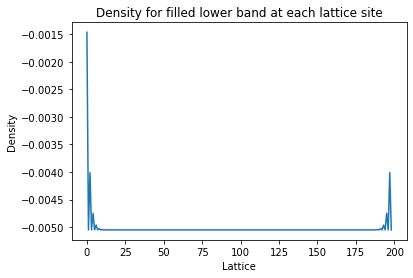

In [169]:
plot_density(toy_finite_hamiltonian(tanh_perturbation(200),200), 200, e=0)

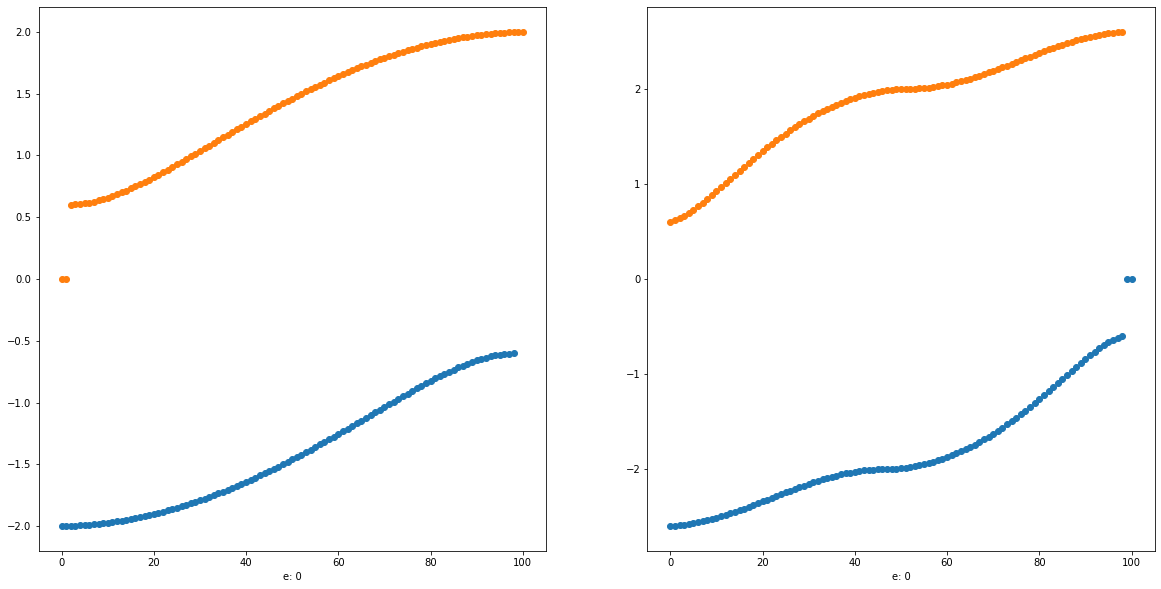

In [172]:
plot_pert_spectra(toy_finite_hamiltonian(tanh_perturbation(200),200),200)

In [34]:
def plot_pert_polarizations_range(H, N, min_e=0, max_e=0.2, num=100):
    rate = (max_e - min_e) / num
    pols = []
    local_pols = []
    for i in range(0, num):
        p = local_polarization(H, N, min_e=min_e, max_e= min_e + rate * (i+1), invert=False)
        local_pols.append(p)
        pols.append(np.average(p))
    
    return pols, local_pols

pols, local_pols = plot_pert_polarizations_range(toy_finite_hamiltonian(periodic_dimer_perturbation(500),500),500, num=10)

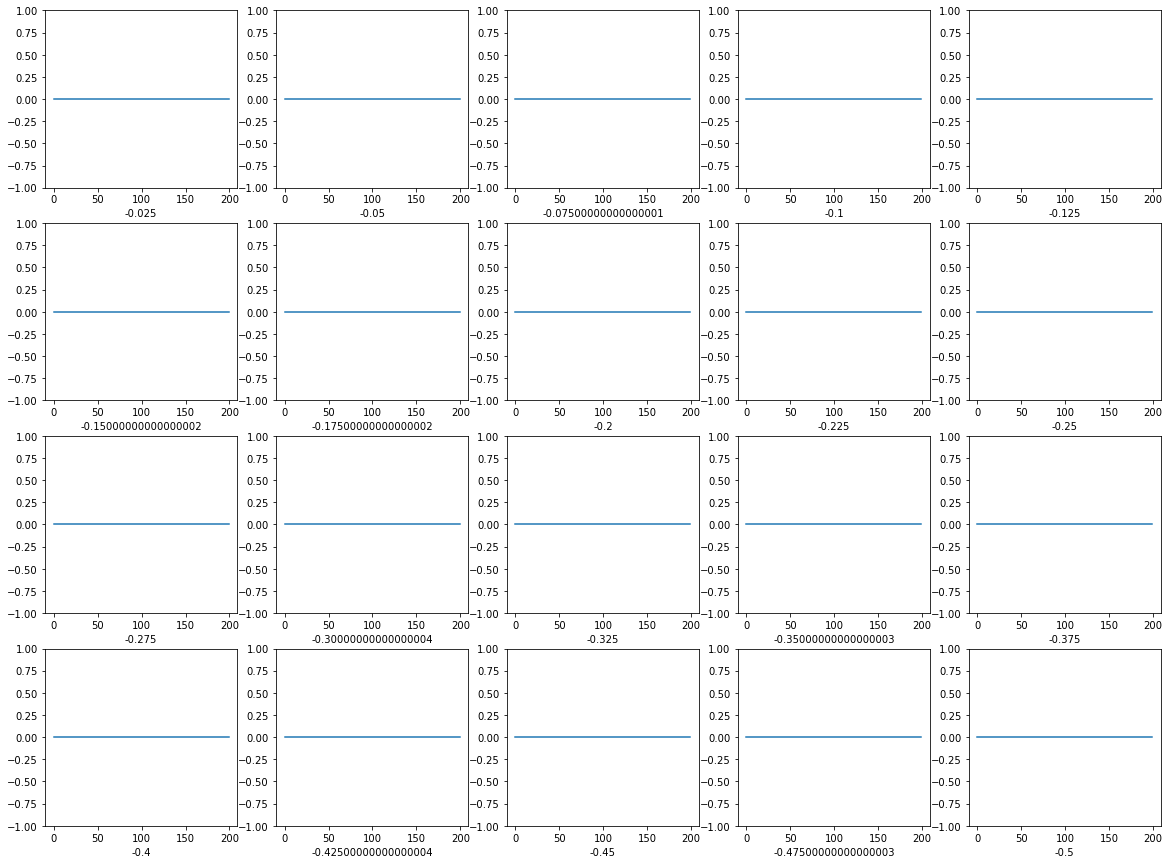

In [81]:
plot_pert_polarizations(toy_finite_hamiltonian(linear_perturbation(200),200),200,min_e=0, max_e=-0.5)

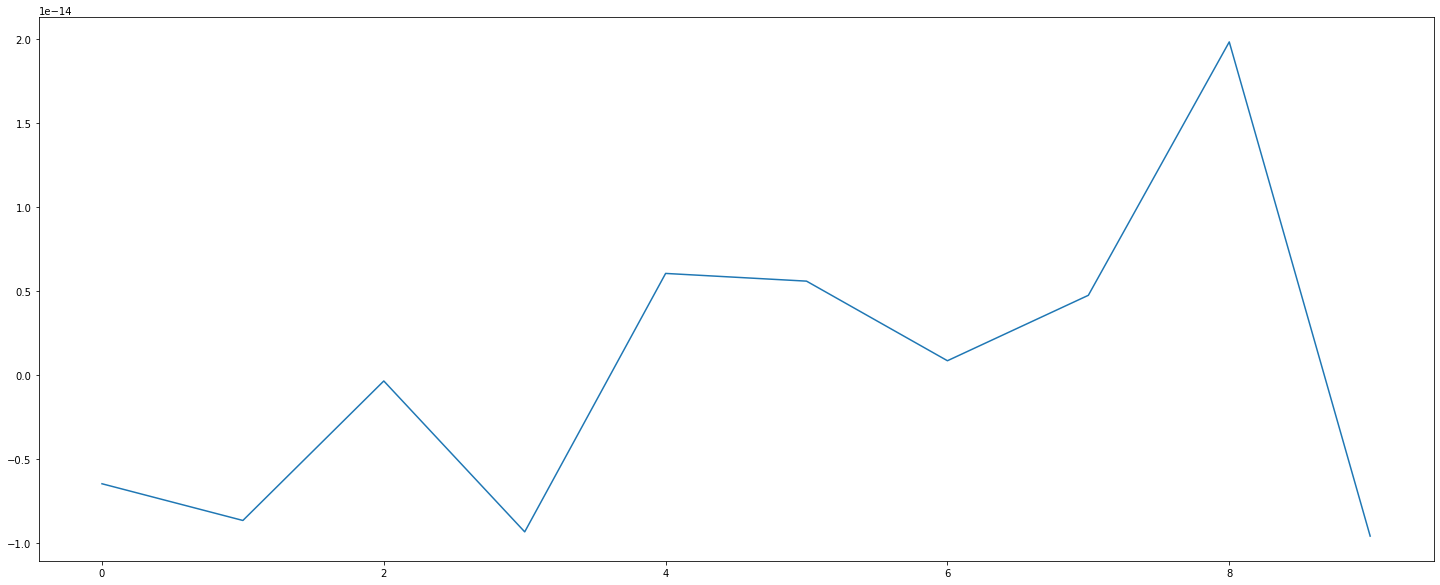

In [8]:
plt.figure(figsize=(25,10))
plt.plot(np.arange(0,10), pols)
# Idea, as the change occurs for very small values of epsilon we should be able to use perturbation theory to arrive at a result 
# This could be that this change is functioning as a charge pump

In [68]:
N=3000
H = toy_finite_hamiltonian(tanh_perturbation(N), N)

def plot_perturbed_eigenvectors(H, epsilon, row_num=2, col_num=4, invert=False):
    eigs, vecs = H(epsilon, invert=invert)
    plt.figure(figsize=(25,10))
    j=1
    for i in [0,1,2,3,4,5,6,7]:
        plt.subplot(row_num,col_num,j)
        j+=1
        plot_eigvec(vecs[i])
        plt.xlabel(eigs[i])

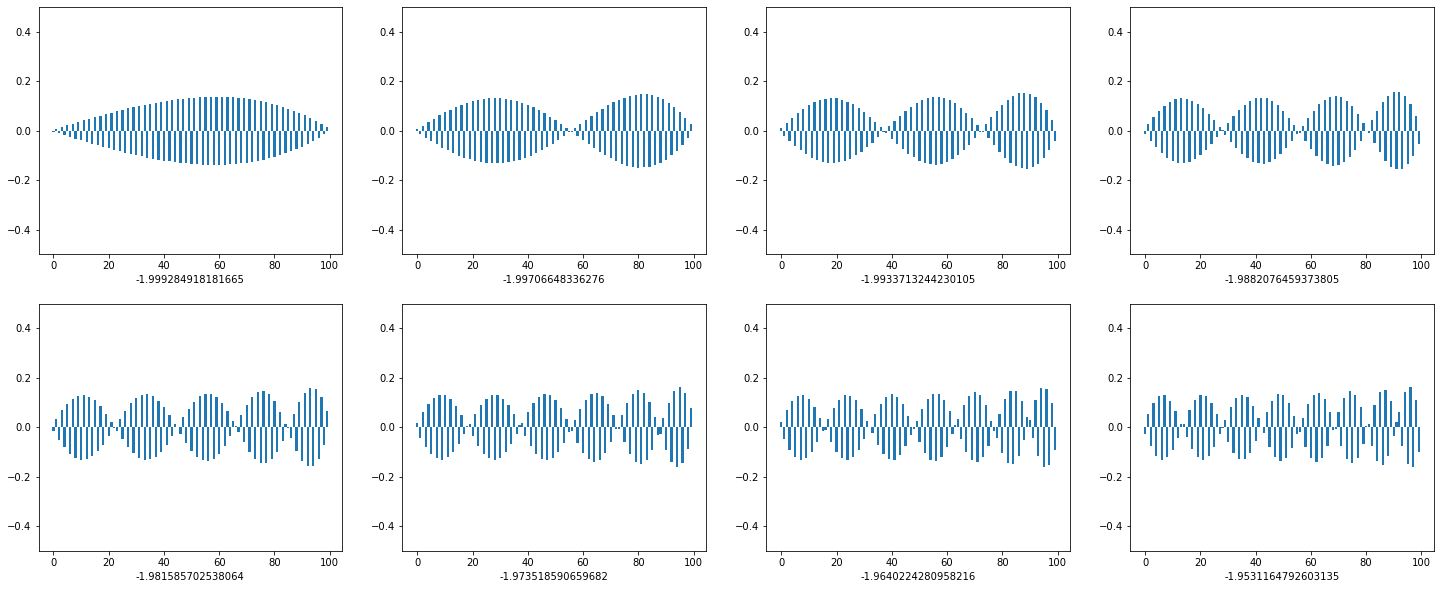

In [80]:
H_2 = toy_finite_hamiltonian(linear_perturbation(100), 100)
plot_perturbed_eigenvectors(H_2, -0.9, invert=False)
# eigs_a, _ = H(-.1, invert=True)
# eigs_b, _ = H(-.1, invert=False)

In [275]:
def plot_zero_energy_states(H, e, zero_lim=1e-4):
    e, vecs = H(e)
    zero_vecs = vecs[np.abs(e)<zero_lim]
    n = zero_vecs.shape[0]

    plt.figure(figsize=(25,10))
    plt.title("Zero energy states")

    for i in range(0,n):
        plt.subplot(1,n,i+1)
        v = zero_vecs[i]
        plt.plot(np.arange(0,len(v)),v)
        plt.xlabel("Lattice index")
        plt.ylabel("Amplitude")


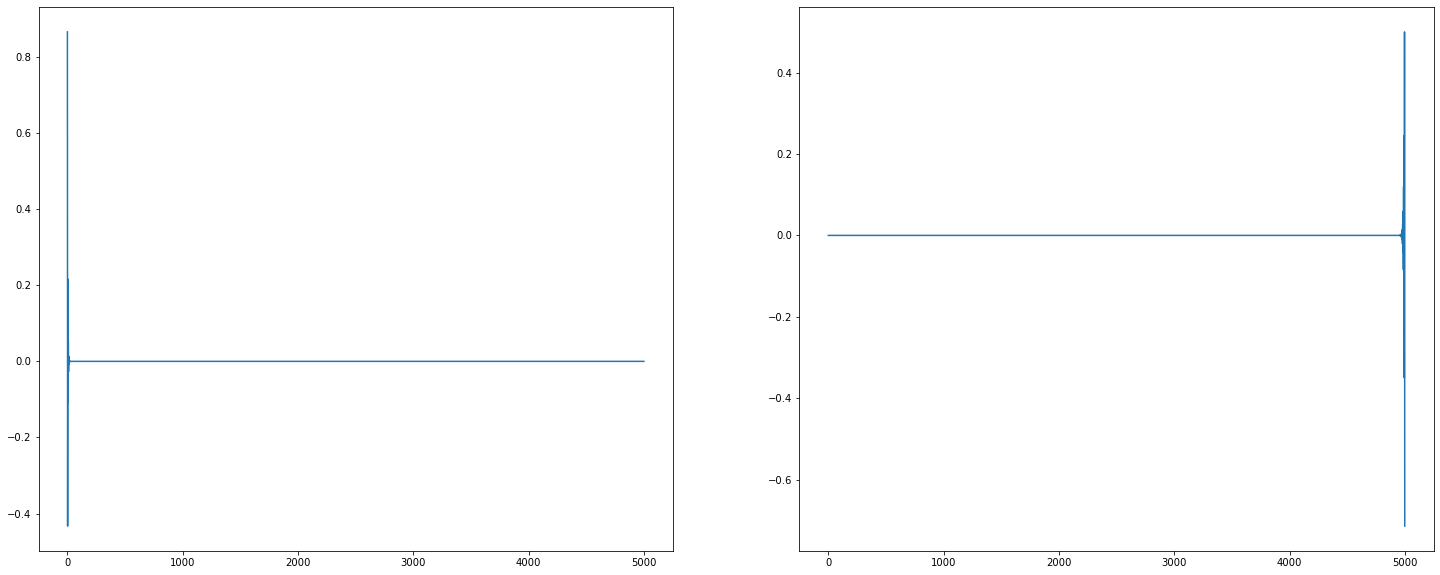

In [193]:
plot_zero_energy_states(toy_finite_hamiltonian(dimer_perturbation(5000),5000),0.7)

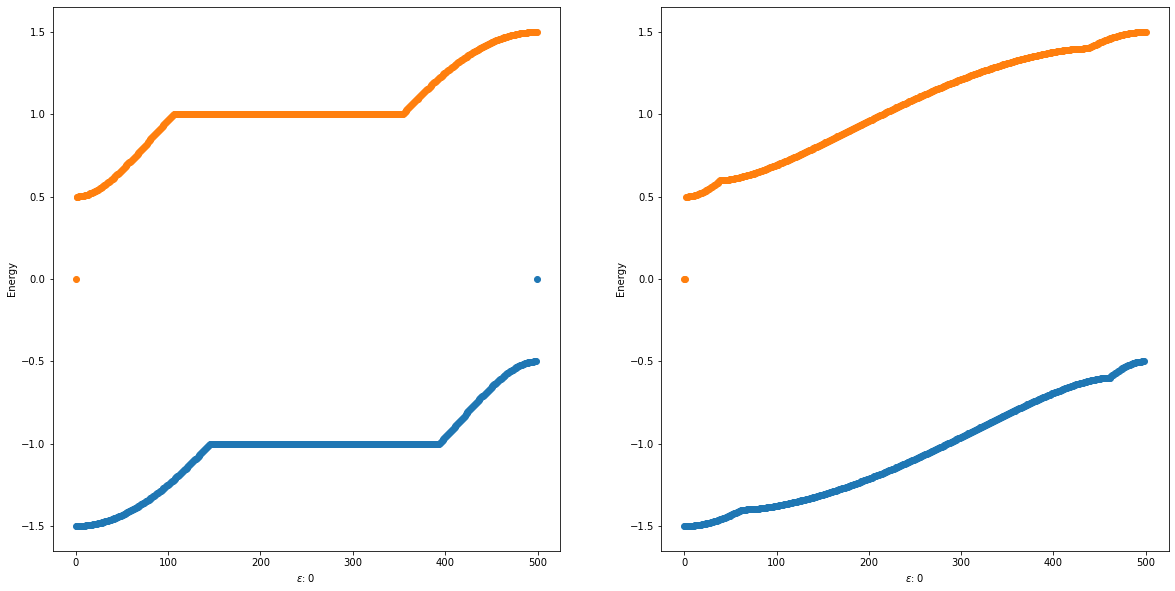

In [520]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import spsolve as solve

def sparse_right_charge(a, ket):
    print("k)")

def sparse_toy_matrix(v, N, epsilon=0, invert=False):
    if not is_even(N):
        raise Exception("N must be even")

    
    data = []
    row_ind = []
    col_ind = []
    for k in range(0,N//2):
        i = 2 * k

        # mat[i][i+1] = v(i, epsilon, invert=invert)
        row_ind.append(i)
        col_ind.append(i+1)
        data.append(v(i, epsilon, invert=invert))

        # mat[i][i+1] = v(i, epsilon, invert=invert)
        row_ind.append(i+1)
        col_ind.append(i)
        data.append(v(i, epsilon, invert=invert))
        if i + 2 < N:
            # mat[i+1][i+2] = v(i+1, epsilon, invert=invert)
            row_ind.append(i+1)
            col_ind.append(i+2)
            data.append(v(i+1, epsilon, invert=invert))
            
            # mat[i+2][i+1] = v(i+1, epsilon, invert=invert)
            row_ind.append(i+2)
            col_ind.append(i+1)
            data.append(v(i+1, epsilon, invert=invert))
    
    return csr_matrix((data, (row_ind, col_ind)))

def sparse_toy_model(v, N, epsilon=0, invert=False):
    mat = sparse_toy_matrix(v, N, epsilon=epsilon, invert=invert)
    eigs, vecs = eigsh(mat,k=N-2, which='LM', sigma=0.01) 

    return eigs, vecs.T 

def sparse_toy_hamiltonian(perturbation, N):
    def H(epsilon, invert=False):
        return sparse_toy_model(perturbation, N, epsilon=epsilon, invert=invert)
    
    return H


sh = toy_finite_hamiltonian(dimer_perturbation(1000),1000)
plot_pert_spectra(sh, 998, min_e=0, max_e=0.4)

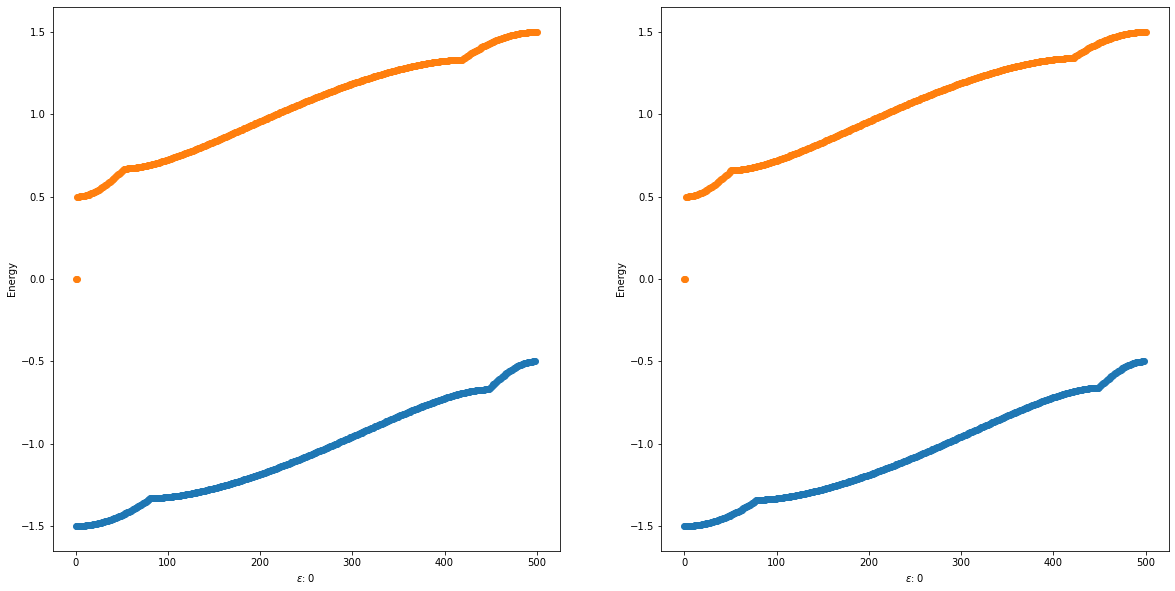

In [303]:
plot_pert_spectra(sh, 998, min_e=0.33, max_e=0.34)

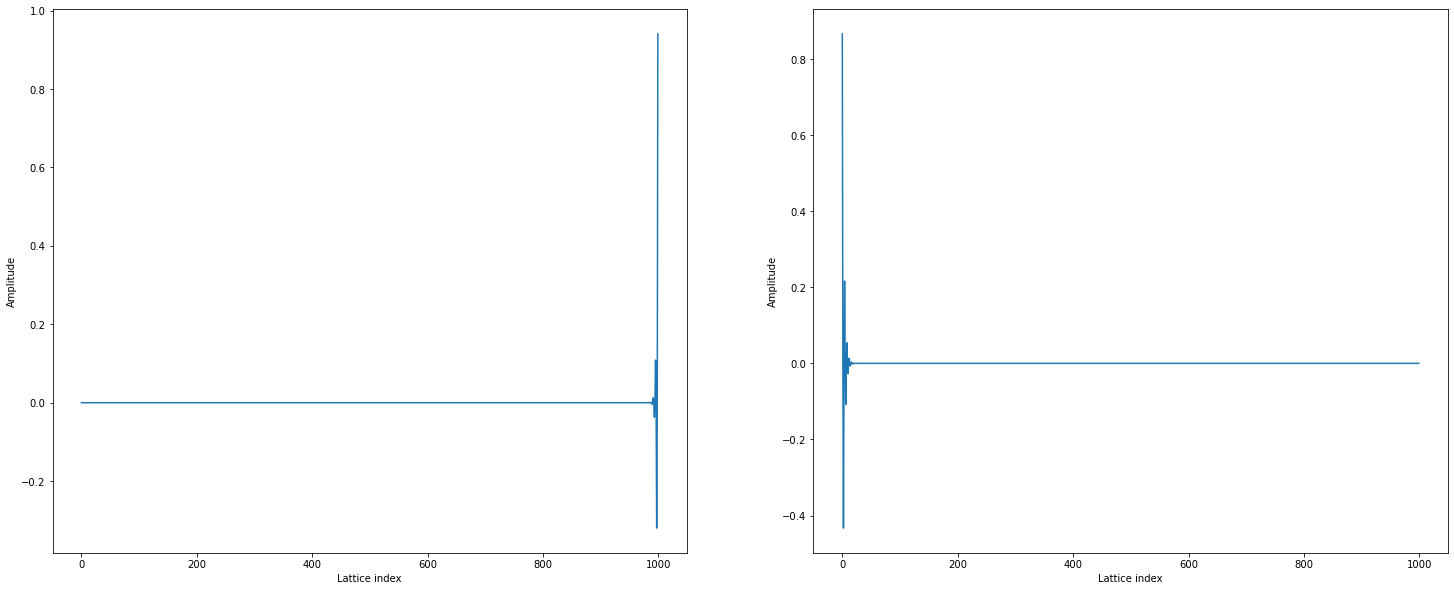

In [302]:
plot_zero_energy_states(sh, 0.34)

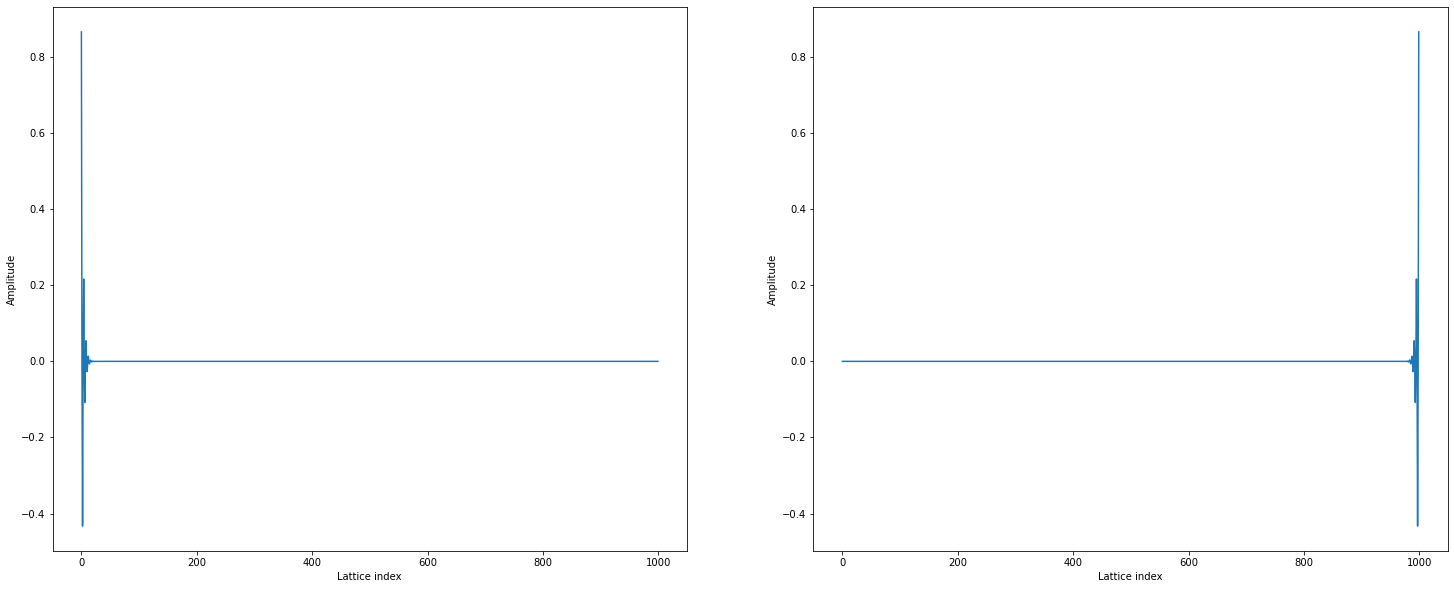

In [422]:
plot_zero_energy_states(sh,0.5)


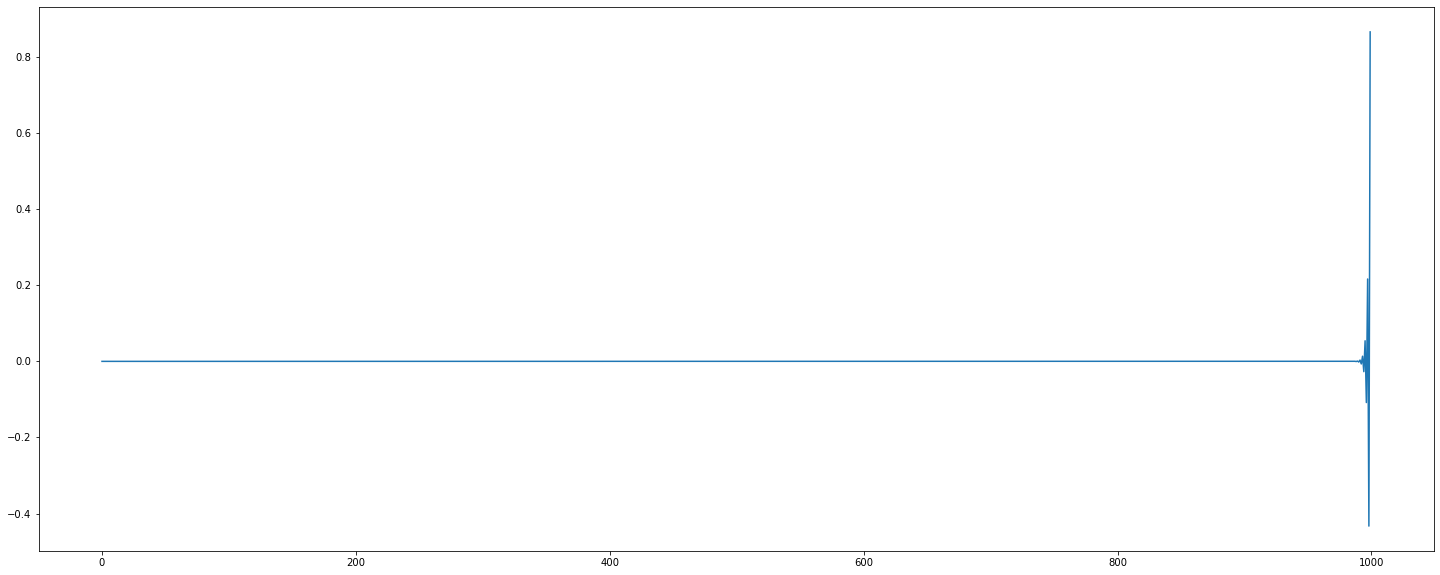

In [484]:
# Computes the analytical near zero energy eigenstates
def analytical_near_zero_eigenstates(v, N, e, invert=False):
    # first compute all terms
    vs = []
    ws = []

    for i in range(0,N):
        if is_even(i):
            vs.append(v(i, e)) 
        else:
            ws.append(v(i, e))
    
    vs = np.array(vs)
    ws = np.array(ws)

    # Compute the bulk average and localization
    bulk_v = 0
    bulk_w = 0

    for vi in vs:
        bulk_v += np.log(np.abs(vi))
    
    for wi in ws:
        bulk_w += np.log(np.abs(wi))
    
    M = N//2
    bulk_v /= N-1
    bulk_w /= N-1
    loc = 1/(bulk_w - bulk_v)
    # Compute the localised states
    L = np.ones(M)
    R = np.ones(M)

    L[0] = 1
    R[M-1] = 1


    # Compute the remaining contributions
    for m in range(0,M):
        for j in range(0,m):
            L[m] *= -1 * vs[j]/ws[j]

    for m in range(0,M - 1):
        R[m] *= -vs[-1]/ws[m]
        for j in range(m+1, M-1):
            R[m] *= -vs[j]/ws[j]
    
    # Normalise 
    L /= np.sqrt(np.dot(L,L))
    R /= np.sqrt(np.dot(R,R))
    
    # Compute hybridization amount
    H = sparse_toy_matrix(v, M, epsilon=e, invert=invert)
    hybridization = (H.T @ L).T @ R
    phi = np.angle(hybridization)
    E_abs = np.abs(hybridization)
    
    # Compute the hybridized states
    Hp = (1/np.sqrt(2)) * (np.exp(-0.5j * phi) * L + np.exp(0.5j * phi) * R)
    Ep = E_abs
    Hm = (1/np.sqrt(2)) * (np.exp(-0.5j * phi) * L - np.exp(0.5j * phi) * R)
    Em = -E_abs

    return [Ep, Em], [Hp, Hm], [L,R]
energies, vecs, edge = analytical_near_zero_eigenstates(dimer_perturbation(2000),2000, 0.5)
plt.figure(figsize=(25,10))
plt.plot(np.arange(0,1000), edge[1])

0.015624999999999998
0.9999999999999999
0.015624999999999998
0.015624999999999998
1.0000000000000004
1.0000000000000002
0.0009765625


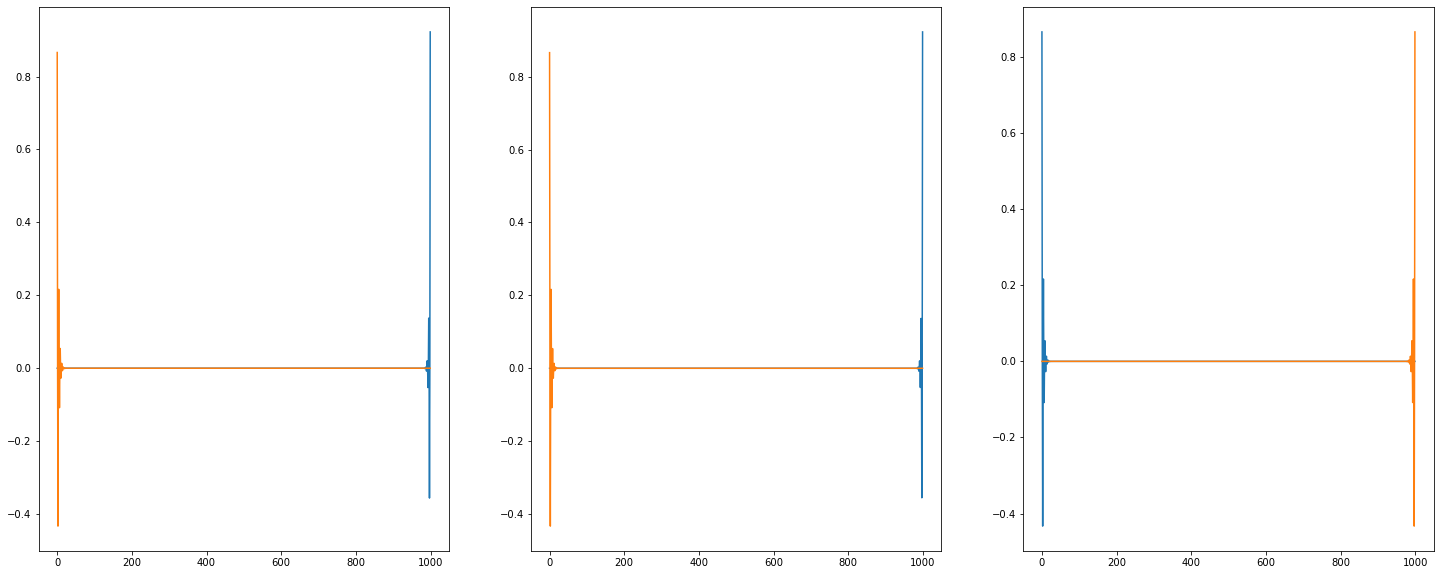

In [502]:
H = toy_finite_hamiltonian(dimer_perturbation(1000),1000)
energies, vecs = sh(0.386)
e, v = H(0.5)
z = v[np.abs(e)< 0.000001]
energies_2, vecs_2 = H(0.385)
zeros = vecs[np.abs(energies) < 0.000001]
zeros_2 = vecs_2[np.abs(energies_2) < 0.0000001]
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.plot(np.arange(0,len(zeros[0])), zeros[0])
plt.plot(np.arange(0,len(zeros[0])), zeros[1])
plt.subplot(132)
plt.plot(np.arange(0,len(zeros[0])), zeros_2[0])
plt.plot(np.arange(0,len(zeros[0])), zeros_2[1])
plt.subplot(133)
plt.plot(np.arange(0,len(zeros[0])), z[0])
plt.plot(np.arange(0,len(zeros[0])), z[1])

print(right_charge(5, z[0]))
print(right_charge(5, z[1]))
print(right_charge(5, zeros_2[1]))
print(right_charge(5, zeros[1]))
print(right_charge(5, zeros_2[0]))
print(right_charge(5, zeros[0]))
print(right_charge(5, edge[0]))

-499.50000000000017


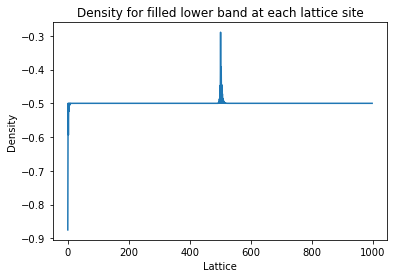

In [517]:
plot_density(H, 1000, e=1.4)

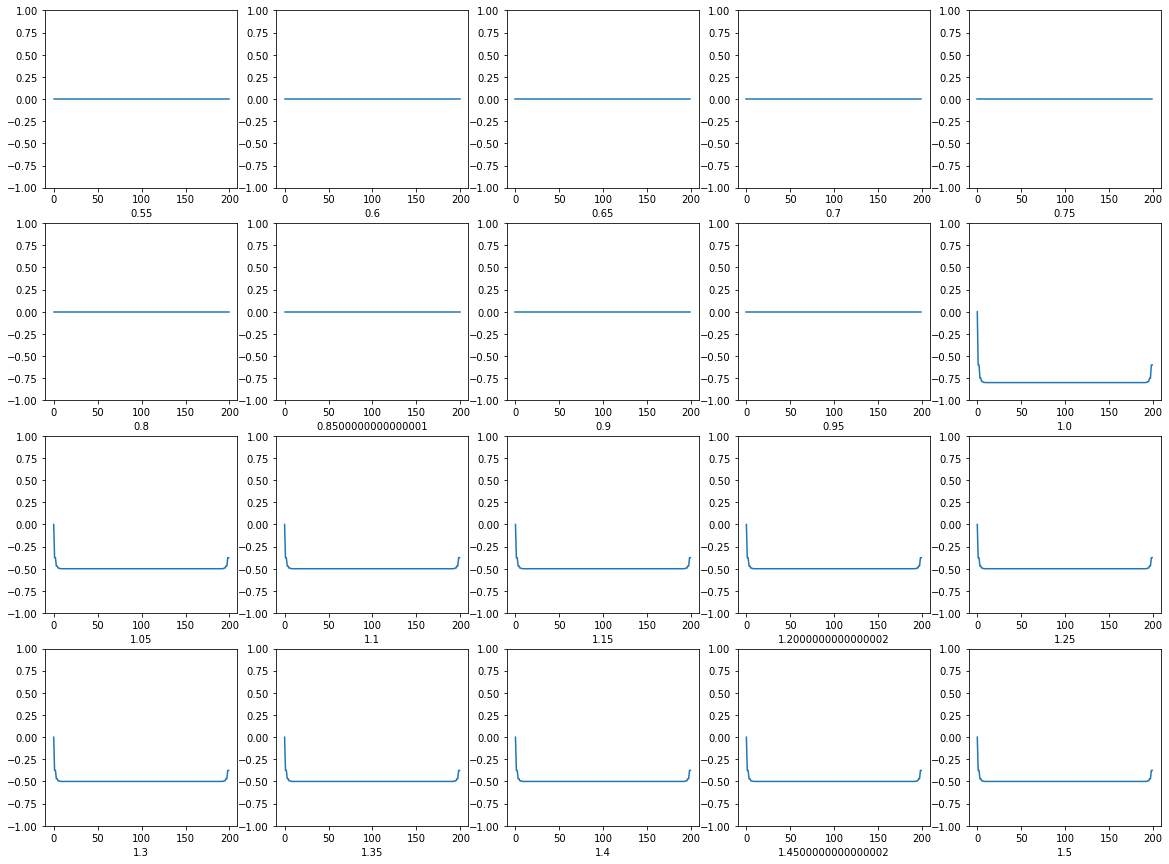

In [566]:
plot_pert_polarizations(toy_finite_hamiltonian(periodic_dimer_perturbation(200),200), 200, min_e=0.5, max_e=1.5)

TypeError: only size-1 arrays can be converted to Python scalars